In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
path=r"Data/advertising.csv"
adver_data = pd.read_csv(path)
X2=np.array(adver_data[['TV', 'Radio', 'Newspaper']])
X = adver_data[['TV', 'Radio', 'Newspaper']].values
y = adver_data[['Sales']].values
means, stds = X.mean(axis=0), X.std(axis=0)
X = (X - means) / stds
X = np.hstack( (X, np.ones((X.shape[0], 1))) )
def mserror(y, y_pred):
    return np.sum((y - y_pred) ** 2) / y.shape[0]
def linear_prediction(X, w):
    return np.dot(X, w)

In [4]:
X.shape

(200, 4)

In [5]:
def predicted_y(weight,x):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i])
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    


#gradient function
def gradient_descent(x,y, max_weight_dist=1e-8,learning_rate = 0.001 ):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    max_iter = 1e4
    n = len(x)
    linear_loss=[]
    weight_dist = np.inf
    iter_num = 0
    
    while  weight_dist > max_weight_dist and iter_num < max_iter:
        #вычисляем значение весов на следующей итерации
        wOld = weight_vector
        y_predicted = predicted_y(weight_vector,x)
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        linear_loss.append(loss(y,y_predicted))
        #расстояние между векторами весов на соседних итерациях
        weight_dist = np.linalg.norm(wOld - weight_vector)
        #счётчик итераций
        iter_num += 1
    plt.plot(np.arange(1,iter_num),linear_loss[1:])
    plt.axis([0, max_iter, 0, 250])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector
   
        

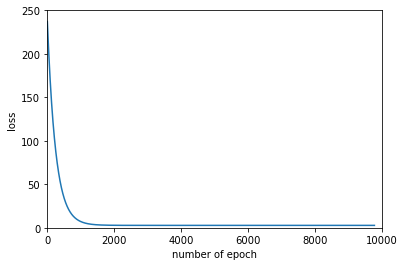

In [6]:
w=gradient_descent(X,y)

In [7]:
print("weight:",w)


weight: [ 3.91925361  2.79205728 -0.02253314 14.02249995]


In [8]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i])
    return np.array(y_lst)

In [9]:
y_pred=predict(X)

In [10]:
df_pred=pd.DataFrame()
df_pred["y_actual"]=y[:,0]
df_pred["y_predicted"]=np.round(y_pred,1)
df_pred

,y_actual,y_predicted
0,22.1,20.5
1,10.4,12.3
2,9.3,12.3
3,18.5,17.6
4,12.9,13.2
...,...,...
195,7.6,5.4
196,9.7,8.2
197,12.8,12.8
198,25.5,23.8


__sklearn__

In [11]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(alpha=0,learning_rate="constant",fit_intercept=False,eta0=0.001)
model.fit(X,y)

/home/user/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor(alpha=0, eta0=0.001, fit_intercept=False, learning_rate='constant')

In [12]:
model.intercept_

array([0.])

In [13]:
model.coef_

array([3.91644525e+00, 2.76960820e+00, 2.39085542e-03, 1.39941702e+01])

In [14]:
w

array([ 3.91925361,  2.79205728, -0.02253314, 14.02249995])